In [23]:
import pandas as pd
import numpy as np
import re
import prince
import matplotlib.pyplot as plt

#  2.7

In [12]:
def get_score_pro(name,sense):
    try:
        data_reason_e=pd.read_csv('%s_PCAuto.csv'%name,encoding='GBK')
    except:
        data_reason_e=pd.read_csv('%s_PCAuto.csv'%name)
    try:
        data_reason_e_X=pd.read_csv('%s_Xcar.csv'%name,encoding='GBK')
    except:
        data_reason_e_X=pd.read_csv('%s_Xcar.csv'%name)
    #score_e_X=(data_reason_e_X["score"])[2]
    evaluation_name_e_X=["外观","内饰","空间", '舒适', '油耗', '动力', '操控', '性价比']
    sco_e_X=pd.DataFrame(columns=evaluation_name_e_X,index=["%s"%name])
    #print(sco_e_X)
    sco_e_X=sco_e_X.fillna(0)
    print('%sXcar'%name,len(data_reason_e_X))
    score_e_X=list(data_reason_e_X['score'].dropna())
    print(score_e_X[0])
    for i in range(len(score_e_X)):
        s=eval(score_e_X[i])
        for j in evaluation_name_e_X:
            try:
                if sense=="positive":
                    if s[j]=="5":
                        sco_e_X[j][0]+=1
                else:
                    sco_e_X[j][0]=5-int(s[j])
            except:
                continue
    evaluation_name_e=["外观","内饰","空间","配置","动力","操控","油耗","舒适","性价比",'越野']
    sco_e=pd.DataFrame(columns=evaluation_name_e,index=["%s"%name])
    sco_e=sco_e.fillna(0)
    #print('%sPCAuto'%name,len(data_reason_e))
    score_e=list(data_reason_e['score'].dropna())
    #print(score_e[0])
    for i in range(len(score_e)):
        s=eval(score_e[i])
        for j in evaluation_name_e:
            try:
                if sense=="positive":
                    if s[j]=="5":
                        sco_e[j][0]+=1
                else:
                    sco_ep[j][0]=5-int(s[j])
            except:
                continue
    #print(sco_e)
    sco_e_pro_X=sco_e_X/len(score_e_X)
    sco_e_pro=sco_e/len(score_e)
    #sco_e_pro['性价比'][0]+=sco_e_X.iloc[0,7]/(len(score_e_X))
    for i in evaluation_name_e:
        #print(i)
        try:
            #print(i)
            sco_e_pro[i][0]=(sco_e_pro_X[i][0]+sco_e_pro[i][0])/2
        except:
            continue
    return(sco_e,sco_e_pro,score_e_X,data_reason_e,data_reason_e_X)

In [13]:
def get_review(data_reason_c):
    pros_c,out_c,cons_c,inside_c,space_c,distr_c,motion_c,mana_c,oil_c,com_c =[],[],[],[],[],[],[],[],[],[]
    for i in range(len(data_reason_c)):
        review=(data_reason_c["review"][i]).replace("\n","")
        pros_c.append(re.findall("优点：(.+?).[点观饰间置力纵耗适]：.*",review))
        cons_c.append(re.findall("缺点：(.+?).[点观饰间置力纵耗适]：.*",review))
        out_c.append(re.findall("外观：(.+?).['点观内饰''空间''配置''动力''操纵''油耗''舒适']：.*",review))
        inside_c.append(re.findall("内饰：(.+?).[点观饰间置力纵耗适]：.*",review))
        space_c.append(re.findall("空间：(.+?).[点观饰间置力纵耗适]：.*",review))
        distr_c.append(re.findall("配置：(.+?).[点观饰间置力纵耗适]：.*",review))
        motion_c.append(re.findall("动力：(.+?).[点观饰间置力纵耗适]：.*",review))
        mana_c.append(re.findall("操纵：(.+?).[点观饰间置力纵耗适]：.*",review))
        oil_c.append(re.findall("油耗：(.+?).[点观饰间置力纵耗适]：.*",review))
        com_c.append(re.findall("舒适：(.+?)[点观饰间置力纵耗适]：*",review))
        count_price_c=0
    count_out_c=0
    count_oil_c=0
    count_space_c=0
    count_comf_c=0
    count_name_c=0
    for string in pros_c:
    #word_list=jieba.lcut(string)
    #print(string)
        if len(string)==0:
            continue
        if len(re.findall(".*[便宜价惠万].*",string[0]))>0:
        #print(string)
            count_price_c+=1
        if len(re.findall(".*[漂亮美外观形时尚看].*",string[0]))>0:
            count_out_c+=1
        if len(re.findall(".*[省油].*",string[0]))>0:
        #print(string)
            count_oil_c+=1
        if len(re.findall(".*[宽空间敞].*",string[0]))>0:
        #print(string)
            count_space_c+=1
        if len(re.findall(".*[舒服适软坐].*",string[0]))>0:
        #print(string)
            count_comf_c+=1
        if len(re.findall(".*[名品牌奔驰].*",string[0]))>0:
            #print(string)
            count_name_c+=1
    count_price_c
    return(count_price_c)

In [18]:
def dropzerolines(d):
    ind=[]
    for i in d.index:
        if d.loc[i,:].sum()==0:
            ind.append(i)
    d.drop(labels=None,axis=0, index=ind, columns=None, inplace=True)
    #return d
#print(sco_C)
#dropzerolines(sco_C)
#sco_C


In [19]:
def prince_plot(sco,pic_name):
    #print(sco)
    sco.fillna(0)
    dropzerolines(sco)
    print(sco)
    ca=prince.CA(
         n_components=2,
         n_iter=3,
         copy=True,
         check_input=True,
         engine='auto',
         random_state=44
    )
    sco.columns.rename("Reasons",inplace=True)
    sco.index.rename("CarName",inplace=True)
    sco.fillna(0)
    print(sco)
    print(np.isnan(sco).any())
    ca=ca.fit(sco)
    ax = ca.plot_coordinates(
        X=sco,
        ax=None,
        figsize=(10,10),
        x_component=0,
        y_component=1,
        show_row_labels=True,
        show_col_labels=True
    )
    plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
    plt.rcParams['axes.unicode_minus']=False
    #plt.rcParams['figure.figsize'] = (10.0, 5.0)  # 尺寸
    plt.savefig("%s.png"%pic_name)
    #ax.get_figure()

In [20]:
def re_label(b):
    #print(b)
    label=["外观","内饰","空间","配置","动力","操控","油耗","舒适","性价比",'越野']
    label_en=["Appearance", "Interior-decoration", "Space", "Configuration", "Power", "Operation", "Fuel-Consumption", "Comfort", "Cost", "Off-road Riding"]
    labelmap= dict(map(lambda x,y:[x,y],label,label_en))
    b.rename(index=labelmap,inplace=True)
    #print(b)
    return b

In [33]:
def CA(sense):
    sco_E,sco_E_pro,score_E_X,data_reason_E,data_reason_E_X=get_score_pro('Benz-E',sense)
    sco_C,sco_C_pro,score_C_X,data_reason_C,data_reason_C_X=get_score_pro('Benz-C',sense)
    sco_Cadi,sco_Cadi_pro,score_Cadi_X,data_reason_Cadi,data_reason_Cadi_X=get_score_pro('CadillacCT5',sense)
    sco_A4,sco_A4_pro,score_A4_X,data_reason_A4,data_reason_A4_X=get_score_pro('AudiA4L',sense)
    sco_Q5,sco_Q5_pro,score_Q5_X,data_reason_Q5,data_reason_Q5_X=get_score_pro('AudiQ5L',sense)
    sco_BMW3,sco_BMW3_pro,score_BMW3_X,data_reason_BMW3,data_reason_BMW3_X=get_score_pro('BMW3class',sense)
    sco_BMW5,sco_BMW5_pro,score_BMW5_X,data_reason_BMW5,data_reason_BMW5_X=get_score_pro('BMW5class',sense)
    sco_VS90,sco_VS90_pro,score_VS90_X,data_reason_VS90,data_reason_VS90_X=get_score_pro('VolvoS90',sense)
    sco_L,sco_L_pro,score_L_X,data_reason_L,data_reason_L_X=get_score_pro('LEXUS-ES',sense)
    sco_all=pd.concat([sco_E_pro,sco_C_pro,sco_A4_pro,sco_Q5_pro,sco_BMW3_pro,sco_BMW5_pro,sco_VS90_pro,sco_L_pro,sco_Cadi_pro])
    sco_E=pd.concat([sco_E_pro,sco_Q5_pro,sco_BMW5_pro,sco_VS90_pro,sco_L_pro])
    sco_C=pd.concat([sco_C_pro,sco_A4_pro,sco_BMW3_pro,sco_Cadi_pro])
    sco_all=pd.DataFrame(sco_all.values.T, index=sco_all.columns, columns=sco_all.index)
    sco_all=re_label(sco_all)
    sco_E=pd.DataFrame(sco_E.values.T, index=sco_E.columns, columns=sco_E.index)
    sco_E=re_label(sco_E)
    sco_C=pd.DataFrame(sco_C.values.T, index=sco_C.columns, columns=sco_C.index)
    sco_C=re_label(sco_C)
    prince_plot(sco_all,'2.7-all-with-Off-roadriding-%s'%sense)
    prince_plot(sco_all.iloc[0:9,:],'2.7-all-%s'%sense)
    prince_plot(sco_E.iloc[0:9,:],'2.7-E-%s'%sense)
    prince_plot(sco_C.iloc[0:9,:],'2.7-C-%s'%sense)
    return sco_all

Benz-EXcar 480
{'外观': '4', '内饰': '3', '空间': '4', '舒适': '4', '油耗': '3', '动力': '3', '操控': '4', '性价比': '3'}
Benz-CXcar 698
{'外观': '5', '内饰': '5', '空间': '5', '舒适': '5', '油耗': '5', '动力': '5', '操控': '5', '性价比': '5'}
CadillacCT5Xcar 173
{'外观': '4', '内饰': '4', '空间': '5', '舒适': '4', '油耗': '4', '动力': '5', '操控': '5', '性价比': '5'}
AudiA4LXcar 500
{'外观': '4', '内饰': '4', '空间': '4', '舒适': '4', '油耗': '5', '动力': '5', '操控': '5', '性价比': '4'}
AudiQ5LXcar 500
{'外观': '5', '内饰': '4', '空间': '5', '舒适': '5', '油耗': '4', '动力': '5', '操控': '5', '性价比': '4'}
BMW3classXcar 500
{'外观': '4', '内饰': '3', '空间': '4', '舒适': '3', '油耗': '4', '动力': '3', '操控': '4', '性价比': '3'}
BMW5classXcar 499
{'外观': '5', '内饰': '5', '空间': '5', '舒适': '5', '油耗': '5', '动力': '5', '操控': '5', '性价比': '5'}
VolvoS90Xcar 110
{'外观': '5', '内饰': '5', '空间': '5', '舒适': '5', '油耗': '3', '动力': '5', '操控': '5', '性价比': '5'}
LEXUS-ESXcar 500
{'外观': '5', '内饰': '3', '空间': '5', '舒适': '5', '油耗': '5', '动力': '3', '操控': '4', '性价比': '3'}
                       Benz-E    Benz-

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


                       Benz-E  AudiQ5L  BMW5class  VolvoS90  LEXUS-ES
Appearance           0.746045   0.7370   0.759369  0.742681     0.755
Interior-decoration  0.587827   0.4670   0.459282  0.606703     0.615
Space                0.655397   0.4555   0.753023  0.703621     0.609
Configuration        0.362682   0.4390   0.409000  0.338983     0.512
Power                0.527158   0.6250   0.611105  0.563482     0.447
Operation            0.515005   0.3090   0.732523  0.536210     0.510
Fuel-Consumption     0.497262   0.4590   0.463337  0.325655     0.652
Comfort              0.569403   0.4670   0.478262  0.401695     0.635
Cost                 0.238903   0.3500   0.244337  0.481818     0.319
Reasons                Benz-E  AudiQ5L  BMW5class  VolvoS90  LEXUS-ES
CarName                                                              
Appearance           0.746045   0.7370   0.759369  0.742681     0.755
Interior-decoration  0.587827   0.4670   0.459282  0.606703     0.615
Space               

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Reasons,Benz-E,Benz-C,AudiA4L,AudiQ5L,BMW3class,BMW5class,VolvoS90,LEXUS-ES,CadillacCT5
CarName,,,,,,,,,
Appearance,0.746045,0.669835,0.7705,0.7370,0.7205,0.759369,0.742681,0.755,0.869942
Interior-decoration,0.587827,0.670838,0.5095,0.4670,0.4795,0.459282,0.606703,0.615,0.535733
Space,0.655397,0.475272,0.5675,0.4555,0.7775,0.753023,0.703621,0.609,0.498161
Configuration,0.362682,0.359583,0.5190,0.4390,0.3450,0.409000,0.338983,0.512,0.272727
Power,0.527158,0.487928,0.6200,0.6250,0.5955,0.611105,0.563482,0.447,0.563321
Operation,0.515005,0.593911,0.4865,0.3090,0.7820,0.732523,0.536210,0.510,0.608776
Fuel-Consumption,0.497262,0.424624,0.5325,0.4590,0.5000,0.463337,0.325655,0.652,0.367578
Comfort,0.569403,0.493702,0.4390,0.4670,0.4445,0.478262,0.401695,0.635,0.388597
Cost,0.238903,0.252772,0.3000,0.3500,0.3440,0.244337,0.481818,0.319,0.320809


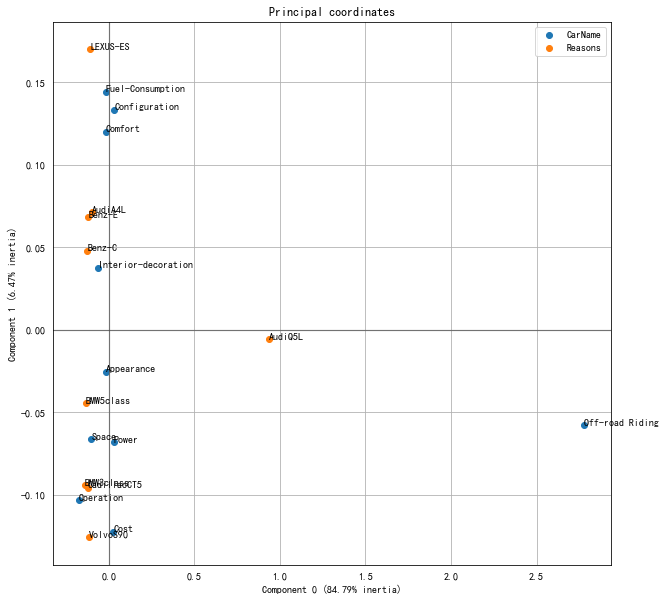

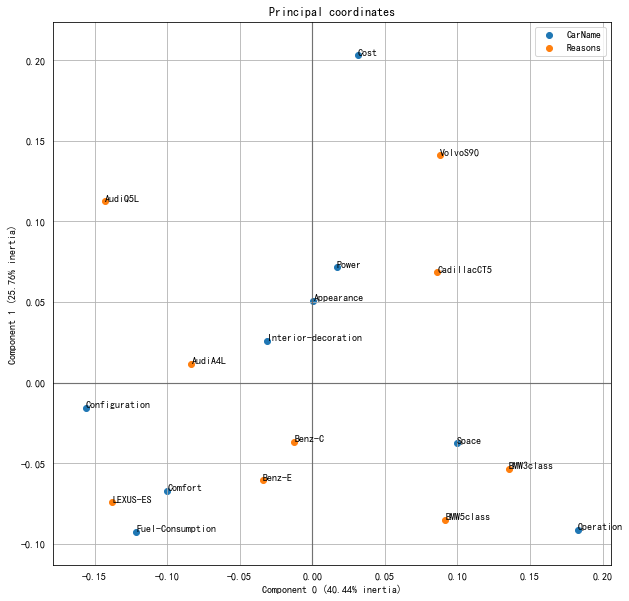

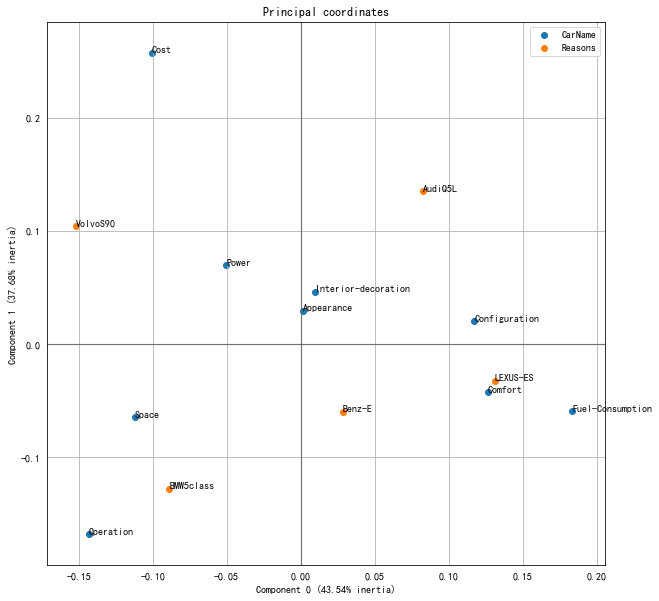

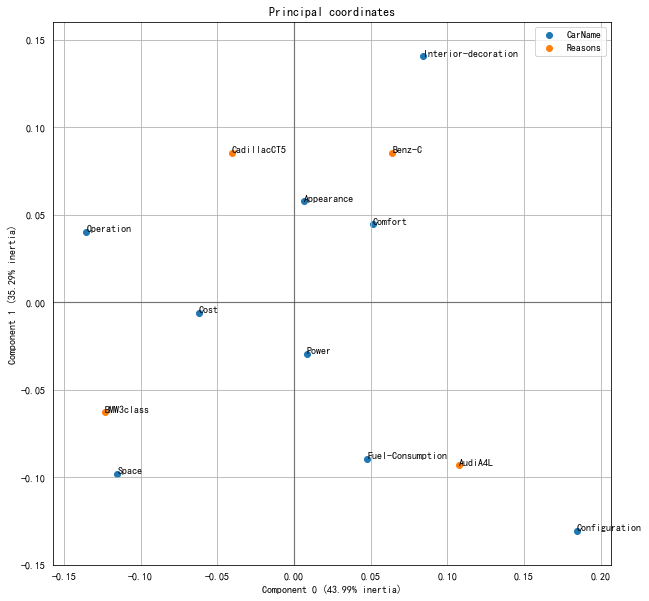

In [34]:
s=CA('positive')